In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

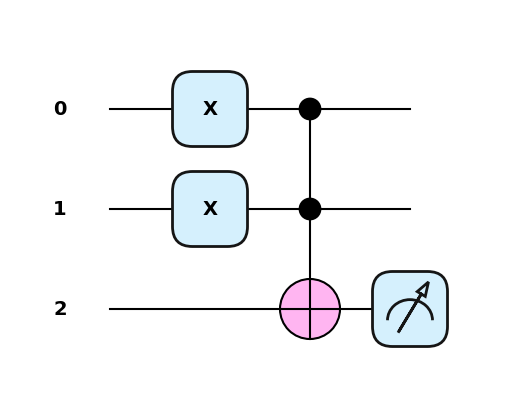

array([0., 1.])

In [4]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def Tgate():
    for i in range(2):
        qml.PauliX(i) # set |111>
        
    qml.Toffoli(wires=range(3))
    return qml.probs(2)

qml.draw_mpl(Tgate, style="pennylane", show_all_wires=True)()
plt.show()

Tgate()

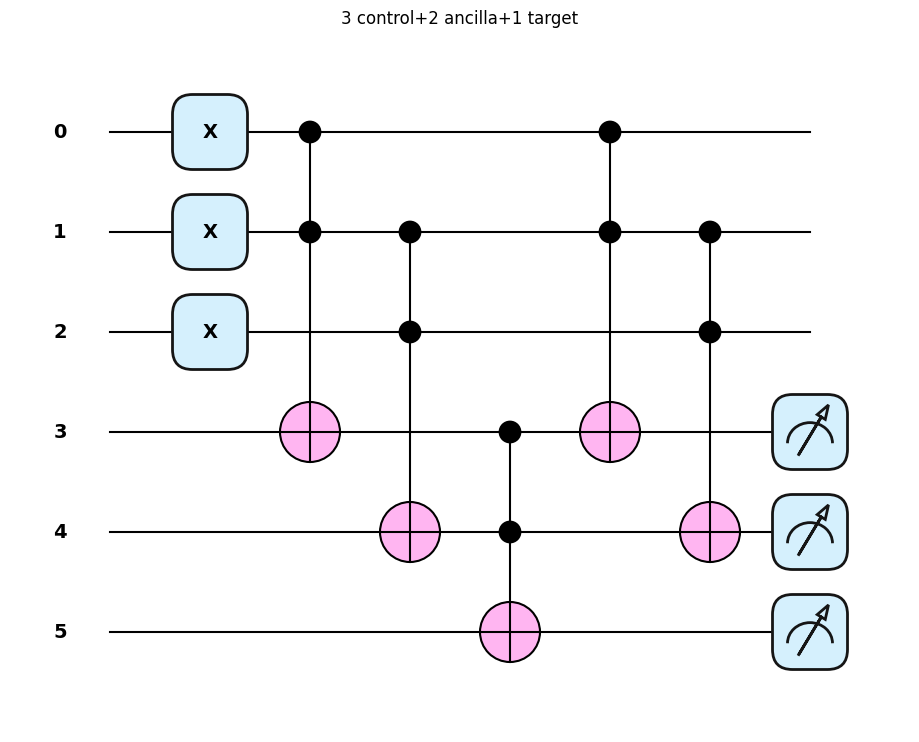

(array([1., 0., 0., 0.]), array([0., 1.]))

In [22]:
# first way to implement CCNOT
dev = qml.device("default.qubit")
reg = qml.registers({"contol_wire": 3, "ancilla": 2, "target_wire":1})

@qml.qnode(dev)
def CCNOT1():
    for i in range(3):
        qml.PauliX(i) # set |111>
        
    qml.Toffoli([0,1,3])
    qml.Toffoli([1,2,4])
    qml.Toffoli([3,4,5])

    # ancilla |1> -> |0>
    qml.Toffoli([0,1,3])
    qml.Toffoli([1,2,4])
    
    return qml.probs(reg['ancilla']), qml.probs(reg['target_wire'])

qml.draw_mpl(CCNOT1, style="pennylane", show_all_wires=True, show_wire_labels=True)()
plt.title('3 control+2 ancilla+1 target')
plt.show()

CCNOT1()

In [ ]:
# first way to implement CCNOT
dev = qml.device("default.qubit")
reg = qml.registers({"contol_wire": 3, "ancilla": 2, "target_wire":1})

@qml.qnode(dev)
def CCNOT1():
    for i in range(3):
        qml.PauliX(i) # set |111>
        
    qml.Toffoli([0,1,3])
    qml.Toffoli([1,2,4])
    qml.Toffoli([3,4,5])

    # ancilla |1> -> |0>
    qml.Toffoli([0,1,3])
    qml.Toffoli([1,2,4])
    
    return qml.probs(reg['ancilla']), qml.probs(reg['target_wire'])

qml.draw_mpl(CCNOT1, style="pennylane", show_all_wires=True, show_wire_labels=True)()
plt.title('3 control+2 ancilla+1 target')
plt.show()

CCNOT1()

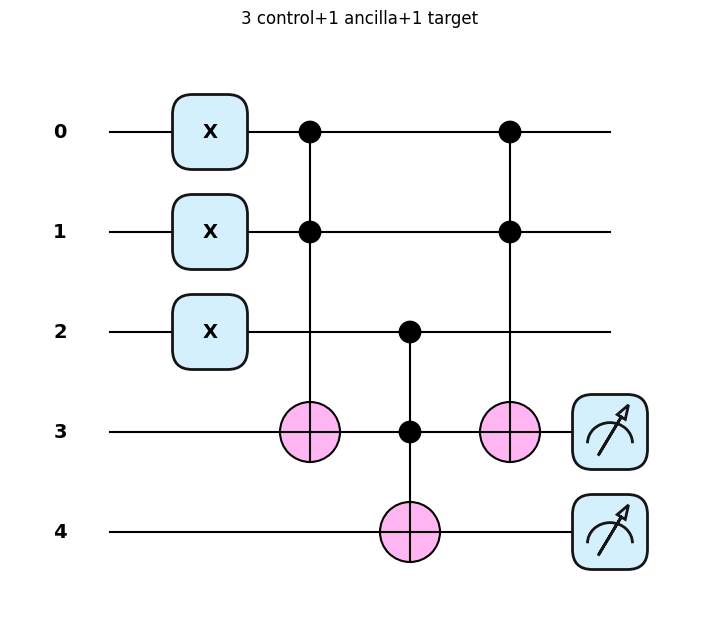

(array([1., 0.]), array([0., 1.]))

In [26]:
# first way to implement CCNOT
dev = qml.device("default.qubit")
reg = qml.registers({"contol_wire": 3, "ancilla": 1, "target_wire":1})

@qml.qnode(dev)
def CCNOT2():
    for i in range(3):
        qml.PauliX(i) # set |111>
        
    qml.Toffoli([0,1,3])
    qml.Toffoli([2,3,4])

    # ancilla |1> -> |0>
    qml.Toffoli([0,1,3])
    
    return qml.probs(reg['ancilla']), qml.probs(reg['target_wire'])

qml.draw_mpl(CCNOT2, style="pennylane", show_all_wires=True, show_wire_labels=True)()
plt.title('3 control+1 ancilla+1 target')
plt.show()

CCNOT2()

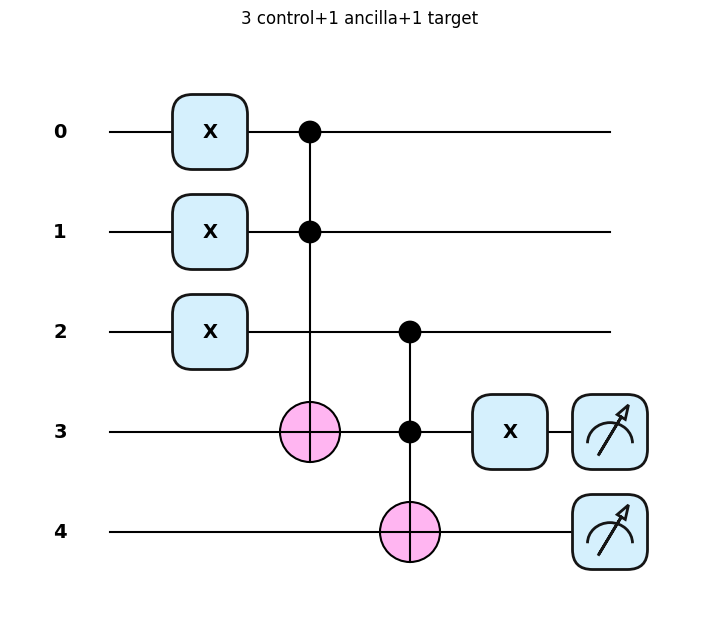

(array([1., 0.]), array([0., 1.]))

In [27]:
# first way to implement CCNOT
dev = qml.device("default.qubit")
reg = qml.registers({"contol_wire": 3, "ancilla": 1, "target_wire":1})

@qml.qnode(dev)
def CCNOT2_X():
    for i in range(3):
        qml.PauliX(i) # set |111>
        
    qml.Toffoli([0,1,3])
    qml.Toffoli([2,3,4])

    # ancilla |1> -> |0>
    qml.PauliX(3)
    
    return qml.probs(reg['ancilla']), qml.probs(reg['target_wire'])

qml.draw_mpl(CCNOT2_X, style="pennylane", show_all_wires=True, show_wire_labels=True)()
plt.title('3 control+1 ancilla+1 target')
plt.show()

CCNOT2_X()

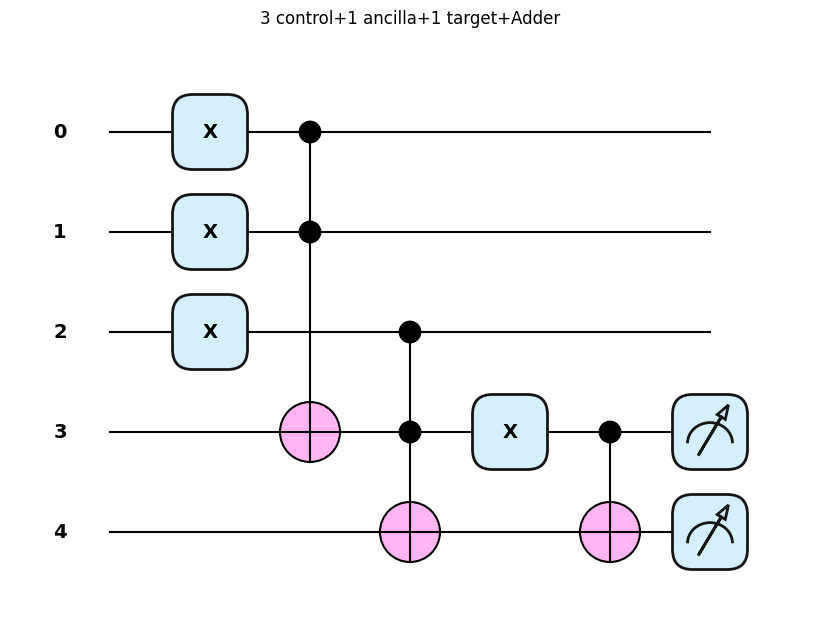

(array([1., 0.]), array([0., 1.]))

In [24]:
# first way to implement CCNOT
dev = qml.device("default.qubit")
reg = qml.registers({"contol_wire": 3, "ancilla": 1, "target_wire":1})

@qml.qnode(dev)
def CCNOT3():
    for i in range(3):
        qml.PauliX(i) # set |111>
        
    qml.Toffoli([0,1,3])
    qml.Toffoli([2,3,4])

    qml.PauliX(3)

    # modular addition
    qml.CNOT([3,4])
    
    return qml.probs(reg['ancilla']), qml.probs(reg['target_wire'])

qml.draw_mpl(CCNOT3, style="pennylane", show_all_wires=True, show_wire_labels=True)()
plt.title('3 control+1 ancilla+1 target+Adder')
plt.show()

CCNOT3()

In [29]:
# CCCNOT - the second way
dev = qml.device("default.qubit")
reg = qml.registers({"contol_wire": 3, "ancilla": 1, "target_wire":1})

def CCCNOT(arr):      
    qml.Toffoli([arr[0],arr[1],arr[3]])
    qml.Toffoli([arr[2],arr[3],arr[4]])

    # ancilla |1> -> |0>
    qml.Toffoli([arr[0],arr[1],arr[3]])

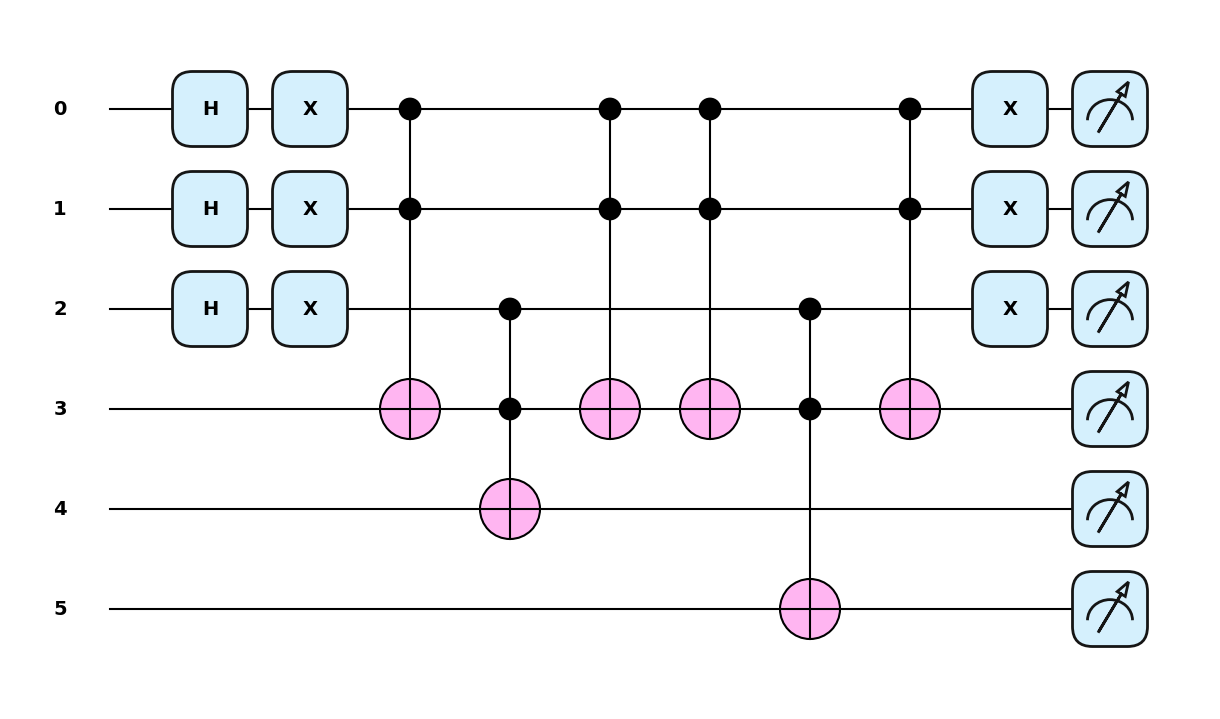

In [30]:
dev = qml.device('default.qubit')
reg = qml.registers({'idx_wire': 3, 'ancilla':1, 'val_wire': 2})

@qml.qnode(dev)
def multipleFlip():
    # index creation
    for idx in reg['idx_wire']:
        qml.Hadamard(idx)
    
    # |000>
    for idx in reg['idx_wire']:
        qml.PauliX(idx)
    CCCNOT([0,1,2,3,4])
    CCCNOT([0,1,2,3,5])
    for idx in reg['idx_wire']:
        qml.PauliX(idx)
    
    return qml.state()

qml.draw_mpl(multipleFlip, style="pennylane", show_all_wires=True)()
plt.show()

[0.875 0.    0.    0.125]


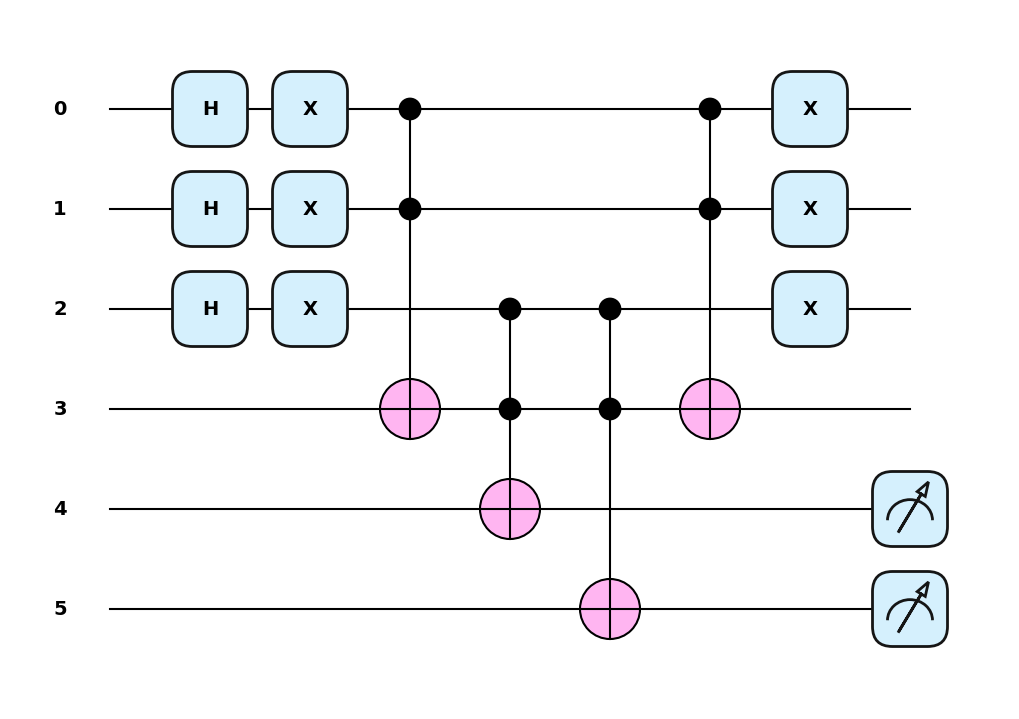

In [37]:
dev = qml.device('default.qubit')
reg = qml.registers({'idx_wire': 3, 'ancilla':1, 'val_wire': 2})

@qml.qnode(dev)
def multipleFlip_improved():
    # index creation
    for idx in reg['idx_wire']:
        qml.Hadamard(idx)
        qml.PauliX(idx)

    qml.Toffoli([0,1,3])
    qml.Toffoli([2,3,4])
    qml.Toffoli([2,3,5])
    qml.Toffoli([0,1,3])

    for idx in reg['idx_wire']:
        qml.PauliX(idx)
            
    return qml.probs(reg['val_wire'])

print(multipleFlip_improved())

qml.draw_mpl(multipleFlip_improved, style="pennylane", show_all_wires=True)()
plt.show()